<a href="https://colab.research.google.com/github/Niharikasingh722/Neural-Networks/blob/main/tf_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
import os
import PIL
import cv2

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True, cache_dir='.')


In [3]:
import pathlib
data_dir = pathlib.Path(data_dir)

In [4]:
img_cnt=len(list(data_dir.glob('*/*.jpg')))

In [5]:
img_cnt

3670

In [6]:
roses=list(data_dir.glob('roses/*'))

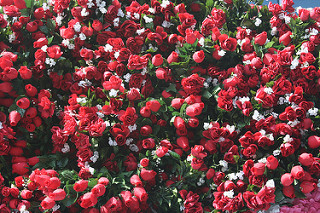

In [7]:
PIL.Image.open(str(roses[0]))

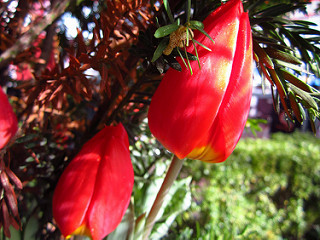

In [8]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

In [9]:
flowers_dict={
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'roses':list(data_dir.glob('roses/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

flowers_label_dict={
    'daisy':0,
    'dandelion':1,
    'roses':2,
    'sunflowers':4,
    'tulips':5
}

array([[[11, 18, 15],
        [10, 17, 14],
        [10, 17, 14],
        ...,
        [ 0,  7,  6],
        [ 0,  6,  5],
        [ 0,  5,  4]],

       [[12, 19, 16],
        [12, 19, 16],
        [11, 18, 15],
        ...,
        [ 3,  9,  8],
        [ 1,  7,  6],
        [ 1,  6,  5]],

       [[11, 18, 15],
        [11, 18, 15],
        [10, 17, 14],
        ...,
        [ 2,  8,  7],
        [ 1,  6,  5],
        [ 0,  5,  4]],

       ...,

       [[10, 17, 37],
        [10, 17, 36],
        [10, 17, 36],
        ...,
        [ 0,  6,  3],
        [ 4, 13, 10],
        [ 0,  9,  6]],

       [[10, 17, 36],
        [10, 17, 36],
        [10, 17, 36],
        ...,
        [ 3,  9,  8],
        [ 0,  6,  5],
        [ 1,  9,  8]],

       [[10, 17, 36],
        [ 8, 15, 34],
        [ 6, 13, 32],
        ...,
        [ 0,  4,  2],
        [ 0,  4,  2],
        [ 0,  5,  2]]], dtype=uint8)
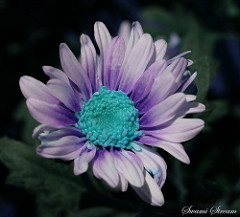

In [10]:
cv2.imread(str(flowers_dict['daisy'][0]))

In [11]:
X,y=[],[]
for flr_name,image in flowers_dict.items():
  for image in image:
    img=cv2.imread(str(image))
    resize_img=cv2.resize(img,(180,180))
    X.append(resize_img)
    y.append(flowers_label_dict[flr_name])

array([[[11, 18, 15],
        [10, 17, 14],
        [ 8, 15, 12],
        ...,
        [ 0,  8,  7],
        [ 0,  7,  5],
        [ 0,  5,  4]],

       [[12, 19, 16],
        [11, 18, 15],
        [ 9, 16, 13],
        ...,
        [ 2, 10,  8],
        [ 2,  8,  7],
        [ 1,  6,  5]],

       [[10, 17, 14],
        [10, 17, 14],
        [ 8, 16, 12],
        ...,
        [ 2, 11,  8],
        [ 1,  7,  6],
        [ 0,  5,  4]],

       ...,

       [[ 9, 16, 36],
        [ 9, 16, 36],
        [ 9, 16, 36],
        ...,
        [ 9, 15, 12],
        [ 6, 14, 10],
        [ 5, 15, 11]],

       [[10, 17, 36],
        [10, 17, 36],
        [ 9, 16, 35],
        ...,
        [ 3,  7,  6],
        [ 2,  8,  6],
        [ 1,  9,  7]],

       [[10, 16, 36],
        [ 7, 14, 33],
        [ 6, 13, 32],
        ...,
        [ 0,  4,  2],
        [ 0,  4,  2],
        [ 0,  5,  3]]], dtype=uint8)
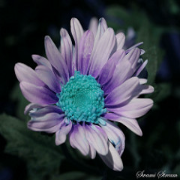

In [12]:
X[0]

In [13]:
X=np.array(X)
y=np.array(y)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

In [15]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

array([[[  7,  12,  13],
        [  7,  11,  12],
        [  6,  13,  13],
        ...,
        [ 41,  47,  58],
        [ 38,  47,  56],
        [ 40,  46,  58]],

       [[  7,  12,  13],
        [  6,  11,  12],
        [  7,  12,  14],
        ...,
        [ 40,  48,  60],
        [ 39,  47,  58],
        [ 39,  46,  57]],

       [[  7,  12,  15],
        [  6,  11,  12],
        [  7,  12,  15],
        ...,
        [ 40,  48,  61],
        [ 38,  47,  59],
        [ 39,  48,  58]],

       ...,

       [[ 75, 108, 134],
        [ 69, 108, 132],
        [ 56, 112, 121],
        ...,
        [111, 140, 172],
        [112, 140, 172],
        [111, 139, 173]],

       [[ 75, 108, 134],
        [ 69, 108, 131],
        [ 55, 110, 118],
        ...,
        [110, 138, 171],
        [110, 138, 171],
        [110, 138, 169]],

       [[ 75, 109, 135],
        [ 67, 108, 130],
        [ 55, 109, 117],
        ...,
        [109, 137, 170],
        [109, 137, 171],
        [110, 138, 169]]], dtype=uint8)
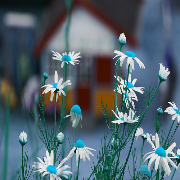

In [20]:
X_train[0]

model creation

In [17]:
y_train

array([0, 5, 1, ..., 1, 5, 5])

In [18]:
print(np.any(np.isnan(y_train)))

False


In [ ]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=8,kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
    keras.layers.MaxPool2D(),
    #Dense
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(5)
])
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=30)